<a href="https://colab.research.google.com/github/raklives/DS-Unit-1-Sprint-2-Statistics/blob/master/My_Notes_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Recap: t-tests

In [0]:
# imports
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [39]:
# Remove null values as these will throw off the ttest
df = pd.read_csv(url, na_values=" ?")
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
# see shape
df.shape

(32561, 15)

In [11]:
# salary values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
# remove missing values by removing na's
# ovverite that data frame
df = df.dropna(how='any')

In [14]:
df.shape

(30162, 15)

In [16]:
## wlook at salary value counts?
df['salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

In [41]:
# data cleaning
df['salary'].value_counts().index

Index([' <=50K', ' >50K'], dtype='object')

In [26]:
# what is the average age
popmean = df['age'].mean()
print(popmean)

38.437901995888865


In [44]:
# restrict to high earners
hibucks = df[df['salary'] ==' >50K']

hibucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [33]:
# is age continuous?
# descirbe the age to find that out 
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [45]:
# is the average age of high earners above the population average? yes.
ttest_1samp(hibucks['age'], popmean, nan_policy='omit')

Ttest_1sampResult(statistic=48.925034868820134, pvalue=0.0)

In [40]:
# is there a sig difference between the age of high and low earners? yes.
lobucks = df[df['salary']==' <=50K']
ttest_ind(hibucks['age'], lobucks['age'], nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

In [46]:
# subset male and female low earners
lobucks_male = df[(df['salary']==' <=50K') & (df['sex']==' Male')]
lobucks_female = df[(df['salary']==' <=50K') & (df['sex']==' Female')]
df['sex'].value_counts().index[0] # note the trailing space.
# note the trailing space.

' Male'

In [47]:
# is there a sig difference between the male and female low earners? yes.
ttest_ind(lobucks_female['age'], lobucks_male['age'], nan_policy='omit')

Ttest_indResult(statistic=-5.118769813761817, pvalue=3.098380651743999e-07)

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [55]:
# consider a crosstab. Are men and women equally distributed by salary?
gap = pd.crosstab(df['sex'], df['salary'])
gap

salary,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [54]:
# can we test that?
# we're running a chi square on our cross tab
# no axis means??
from scipy.stats import chisquare # one way chi test
chisquare(gap, axis=None)

Power_divergenceResult(statistic=1.0297559803947676, pvalue=0.9601302186907169)

In [0]:
 # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation


In [56]:
# an example using simple fake data that is independed
# shows when chi square does not have a low p value
ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)

[[1 2]
 [1 2]]


In [57]:
# let' run  chi square test
chisquare(ind_obs, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [59]:
# Is a distribution normal? This is a poisson distribution
# another example of dependent observations
dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


### TEST OF NORMALCY 

In [0]:
# Let's create a normal distribution
mu, sigma = 0, 1
sample = np.random.normal(mu, sigma, 100)


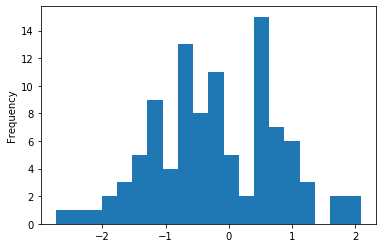

In [63]:
# display sample
sample = pd.Series(sample)
sample.plot(kind='hist', bins=20)

In [64]:
# Is it normal?
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

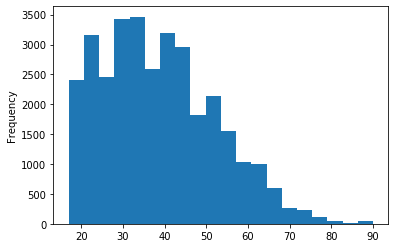

In [66]:
# is age a normal distribution?
# find out by graophing
df['age'].plot(kind='hist', bins=20);
# No, skewed to the left

In [67]:
# is it normal
from scipy.stats import normaltest
normaltest(df['age'])

NormaltestResult(statistic=1526.0108462557214, pvalue=0.0)

In [68]:
# code to fromat cientif notation
print('{:.12f}'.format(normaltest(df['age']).pvalue))

0.000000000000


In [0]:
# mean, std dev, number of obs



# Pretty clearly  normal

In [0]:
# display that!


In [73]:
# Poisson models arrival times and is related to the binomial (coinflip)

fish_sample = np.random.poisson(5, 1000)
normaltest(fish_sample)
# Pretty clearly fisnot normal

NormaltestResult(statistic=26.48897285715281, pvalue=1.770078913318847e-06)

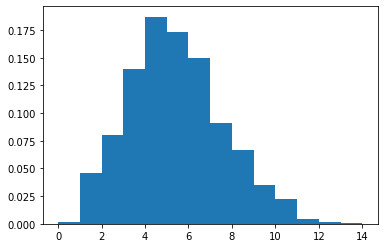

In [75]:
# another way to display that!
count, bins, ignored = plt.hist(fish_sample, 14, density=True)
plt.show()
# this si more normal

And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Central Limit Theorem



In [0]:
# allows you to find the margin or error/ confidence interval 

In [84]:
# Flip a coin.
coinflips = np.random.binomial(n=1, p=.5)
coinflips

1

In [85]:
# Let me flip a coin twelve times.
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

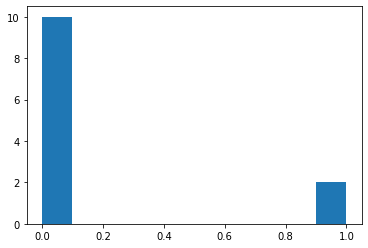

In [86]:
# show that.
plt.hist(coinflips)

In [87]:
# what is the mean of this sample of coinflips?
coinflips.mean()

0.16666666666666666

In [88]:
# what if I do it again?
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [89]:
# and the mean?
coinflips.mean()

0.8333333333333334

In [91]:
# why are these means different? shouldn't it be the same at .5 for a fair coin?
coinflips = np.random.binomial(n=1, p=.5, size=1000)
coinflips.mean()

0.49

In [93]:
# now flip 1000 time
coinflips = np.random.binomial(n=1, p=.5, size=10000)
coinflips.mean()

0.4918

**each of these 'samples' is an estimate of the distribution.** . 
https://www.youtube.com/watch?v=Kq7e6cj2nDw

In [0]:
# take 3000 samples of size 12, and make a list of their means.
# going to create a forloop
sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())


In [97]:
# look at the first 10 means.
print(len(sample_means))

3000


In [100]:
# make a df of one sample
coin_df = pd.DataFrame({'single_sample': coinflips})
coin_df.head()

,single_sample
0,0
1,1
2,1
3,1
4,1


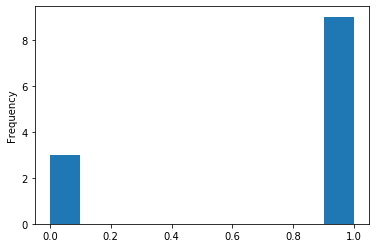

In [101]:
# this df is clearly a binomial distribution (one and zero are the only options)
coin_df['single_sample'].plot(kind='hist')

Text(0.5, 1.0, 'Distribution of 3000 sample means \n (of 12 conflips easch)')

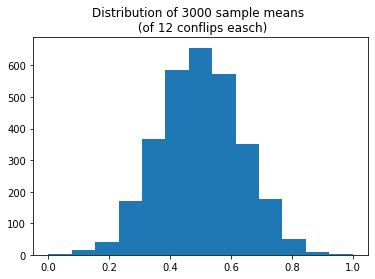

In [103]:
# now plot all 3000 sample means
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 12 conflips easch)')

In [106]:
# is this a normal distribution?
# we use a normal test for this
normaltest(sample_means)

NormaltestResult(statistic=4.875311146744332, pvalue=0.08736543340302426)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [107]:
# pretend each sample mean included 100 coin flips, not just 12
sample_means = []
for x in range(0,3000):
    coinflips = np.random.binomial(n=1, p=.5, size=100)
    one_sample = coinflips
    sample_means.append(coinflips.mean())
# the higher my sample size, the closer I get to .5!
print(len(sample_means))
print(sample_means[:10])

3000
[0.52, 0.46, 0.49, 0.51, 0.49, 0.5, 0.55, 0.51, 0.45, 0.5]


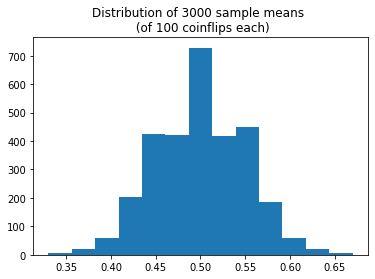

In [108]:
# when I plot, it gets a little taller and a little narrower!
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 100 coinflips each)');

This outcome is what we call the Central Limit Theorem. No matter the distribution of my underlying data, the distribution of the estimates will be distributed normally.

In [0]:
# Compare sets of small and large samples


In [0]:
# Plot that for comparison: it gets taller, narrower, and more normal.


## Confidence Interval

![source](https://www.mathsisfun.com/data/images/ci95.gif)

With 95% confidence, the population mean is within these bounds. This is the [margin of error](https://www.monmouth.edu/polling-institute/reports/monmouthpoll_ia_111219/) we often seen in political polls.

Between the upper and lower bounds we can find 95% of the sample means.

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

s = standard deviation of the sample  
n = sample size  
t = test statistic  
X = sample mean
  
As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats 

In [0]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n -1) # look up the corresponding tstat using 
    return (mean, mean - moe, mean + moe) 

In [113]:
# what's the conf interval for a sample of 500 coin flips?
coinflips = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(coinflips)
# mean, upper bound, lower bound.

(0.52, 0.4760585119803586, 0.5639414880196415)

In [114]:
# try this again. It should capture the mean 95% of the time.
confidence_interval(coinflips)


(0.52, 0.4760585119803586, 0.5639414880196415)

We want the t-statistic that corresponds to the probability cut off for a given t distribution  (a distribution with a certain 'degrees of freedom').  
`stats.t.ppf` is just looking up the corresponding t-statistic.

**Degrees of freedom**  
degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

**Looking at stats.t.ppf**

In [0]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025



## Graphically Represent a Confidence Interval

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

''

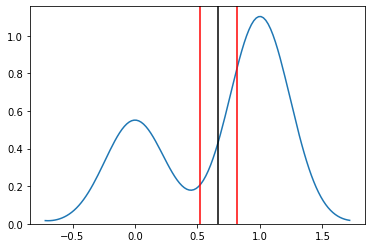

In [121]:
# fake data - one samle of 42 coin flips
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
# kernel density estimate
sns.kdeplot(coinflips_42);
CI = confidence_interval(coinflips_42)
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r')
plt.axvline(x=CI[0], color='k')


;

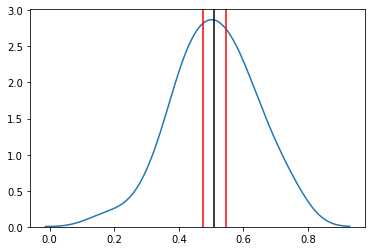

In [124]:
# fake data - 50 samples of 12 coin flips
sample_means = []
for x in range(0,50):
    coinflips = np.random.binomial(n=1, p=.5, size=12)
    one_sample = coinflips
    sample_means.append(coinflips.mean())

# kernel density estimate
sns.kdeplot(sample_means)
CI = confidence_interval(sample_means)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

**Note that scipy has a built-in function to calculate the confidence interval**   
t.interval

In [131]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean)

print(coinflip_means[:10])

[<built-in method mean of numpy.ndarray object at 0x7fc8c27b9a30>, <built-in method mean of numpy.ndarray object at 0x7fc8c27b9b70>, <built-in method mean of numpy.ndarray object at 0x7fc8c27b9d00>, <built-in method mean of numpy.ndarray object at 0x7fc8c27b99e0>, <built-in method mean of numpy.ndarray object at 0x7fc8bff48530>, <built-in method mean of numpy.ndarray object at 0x7fc8bff48850>, <built-in method mean of numpy.ndarray object at 0x7fc8bff48760>, <built-in method mean of numpy.ndarray object at 0x7fc8bff480d0>, <built-in method mean of numpy.ndarray object at 0x7fc8bff48ad0>, <built-in method mean of numpy.ndarray object at 0x7fc8bff48b20>]


**Rebuild the earlier function**
but using `t.interval` instead.

In [0]:
# Sample Size

# Degrees of Freedom

# The Mean of Means:

# Sample Standard Deviation

# Standard Error


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval

A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
# pick a value for my null hypothesis and check the p-value


In [0]:
# what if I pick a null hypothesis that's just outside of our confidence interval? 


In [0]:
# I would only see this 5% of the time, so it's unlikely and I reject the null hypothesis.
# A comparison of what we EXPECT and what we OBSERVE.

## Chi Squared Test $\chi^{2}$

A test for dependence of categorical variables. (ie, are they correlated?)

In [0]:
# read back in the earlier data.


In [0]:
# just the numeric columns


In [0]:
# just the non-numeric columns (ie, categorical)


In [0]:
# create some binned categories 


In [0]:
# sex


In [0]:
# binned category


In [0]:
# create a set of female counts


In [0]:
# create a set of male counts


In [0]:
#Plots the bar chart


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
# Array broadcasting will work with numpy arrays but not python lists


In [0]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)


# Calculate Degrees of Freedom


## Run a $\chi^{2}$ Test using Scipy

Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex.

### Another example

In [0]:
# sex and salary

In [0]:
# chi square test

In [0]:
# age and salary

In [0]:
# crosstab

In [0]:
# chi square test